#### What is a Convolutional Neural Network (CNN)?
A Convolutional Neural Network (CNN) is a class of deep neural networks, most commonly applied to analyzing visual imagery. CNNs are designed to automatically and adaptively learn spatial hierarchies of features through backpropagation by using multiple building blocks, such as convolution layers, pooling layers, and fully connected layers.

#### Key Concepts
1. Convolution Layer: This layer applies a convolution operation to the input, passing the result to the next layer. It is designed to automatically learn spatial hierarchies of features from input images.
1. Pooling Layer: This layer reduces the spatial dimensions (width, height) of the input volume. Pooling layers help in reducing the number of parameters, preventing overfitting, and making the network invariant to small transformations.
1. Fully Connected Layer: After several convolutional and pooling layers, the high-level reasoning in the neural network is done via fully connected layers.
1. Activation Function: Functions like ReLU (Rectified Linear Unit) introduce non-linearity to the network.
1. Dropout: A regularization technique where randomly selected neurons are ignored during training to prevent overfitting

## Building a CNN
We will build a simple CNN for image classification using the MNIST dataset, which consists of 28x28 pixel grayscale images of handwritten digits (0-9).

##### Step-by-Step Implementation
Import Necessary Libraries:

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


C:\Users\karma\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Load and Preprocess Data:

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to include the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


#### Define the CNN Model:

In [3]:
model = models.Sequential()

# Add the first convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add the first pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add the second pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output
model.add(layers.Flatten())

# Add a fully connected layer with 64 units
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 units (for 10 classes)
model.add(layers.Dense(10, activation='softmax'))


C:\Users\karma\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the Model

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#### Train the Model

In [5]:
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8966 - loss: 0.3375 - val_accuracy: 0.9786 - val_loss: 0.0638
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9852 - loss: 0.0481 - val_accuracy: 0.9850 - val_loss: 0.0446
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9889 - loss: 0.0343 - val_accuracy: 0.9892 - val_loss: 0.0333
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9923 - loss: 0.0232 - val_accuracy: 0.9911 - val_loss: 0.0274
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9906 - val_loss: 0.0286


#### Evaluate the Model:

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")


313/313 - 1s - 3ms/step - accuracy: 0.9906 - loss: 0.0286

Test accuracy: 0.9905999898910522


#### Plotting Accuracy and Loss:

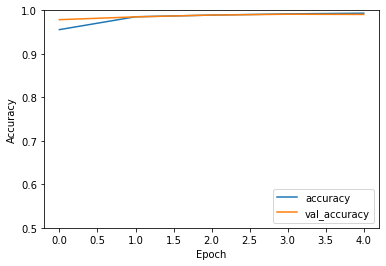

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


### Explanation of the CNN Layers:


#### Conv2D Layer:

0. Filters: The number of filters (32, 64, etc.) determines the number of output channels.
0. Kernel Size: The size of the filter (3x3) determines the region the convolution operation is applied to.
0. Activation Function: ReLU is used to introduce non-linearity.

#### MaxPooling2D Layer:

Pool Size: The size of the pooling window (2x2) reduces the spatial dimensions by taking the maximum value in each window.

#### Flatten Layer:

Converts the 2D matrix into a 1D vector to feed into the fully connected layers.
#### Dense Layer:
Fully connected layer where every neuron is connected to every neuron in the previous layer.

# Advanced Concepts:
0. Batch Normalization: Normalize the activations of the previous layer at each batch.
0. Dropout: Randomly set a fraction of input units to 0 at each update during training time to prevent overfitting.
0. Data Augmentation: Increase the diversity of the training data without actually collecting new data by applying random transformations like rotations, shifts, and flips.

In [8]:
# Adding Batch Normalization and Dropout

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


### Data Augmentation:

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(""
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(train_images)

history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, epochs=5,
                    validation_data=(test_images, test_labels))


SyntaxError: invalid syntax (1118669881.py, line 4)

In [13]:
pip install --upgrade scipy


Note: you may need to restart the kernel to use updated packages.  Downloading scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3



Epoch 1/5
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 2:10:31 4s/step - accuracy: 0.0312 - loss: 3.7268

C:\Users\karma\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.7388 - loss: 0.8242 - val_accuracy: 0.9875 - val_loss: 0.0376
Epoch 2/5


C:\Users\karma\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9875 - val_loss: 0.0376
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9493 - loss: 0.1730 - val_accuracy: 0.9846 - val_loss: 0.0464
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9846 - val_loss: 0.0464
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9631 - loss: 0.1275 - val_accuracy: 0.9907 - val_loss: 0.0307
313/313 - 1s - 4ms/step - accuracy: 0.9907 - loss: 0.0307

Test accuracy: 0.9907000064849854


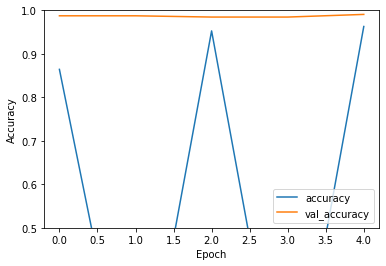

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to include the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the model
datagen.fit(train_images)

batch_size = 32
steps_per_epoch = len(train_images) // batch_size  # Use integer division
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    steps_per_epoch=steps_per_epoch, epochs=5,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Plotting accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
